In [1]:
# from google.colab import drive
from datetime import datetime
import numpy as np
import warnings

# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot

import pandas as pd
import matplotlib.pyplot as plt
import math
import mplfinance as mpf
from sklearn.preprocessing import MinMaxScaler

In [16]:
url = "https://raw.githubusercontent.com/rahmantaufik27/dataset/main/study/forecasting_stock_price_2.csv"
df = pd.read_csv(url, parse_dates=['Timestamp'], index_col='Timestamp')

# Resample to daily data
df = df.resample('W').mean()  # can also use 'W' for weekly, 'H' for hourly, etc.
df = df.dropna()
df = df.drop_duplicates()

close=df[['Close Price']]
close.head(10)

,Close Price
Timestamp,
2015-01-04,18874.252267
2015-01-11,18661.391333
2015-01-18,18922.720107
2015-01-25,19764.521680
2015-02-01,20352.534400
2015-02-08,19339.222187
2015-02-15,18883.458480
2015-02-22,19215.690200
2015-03-01,18951.067933


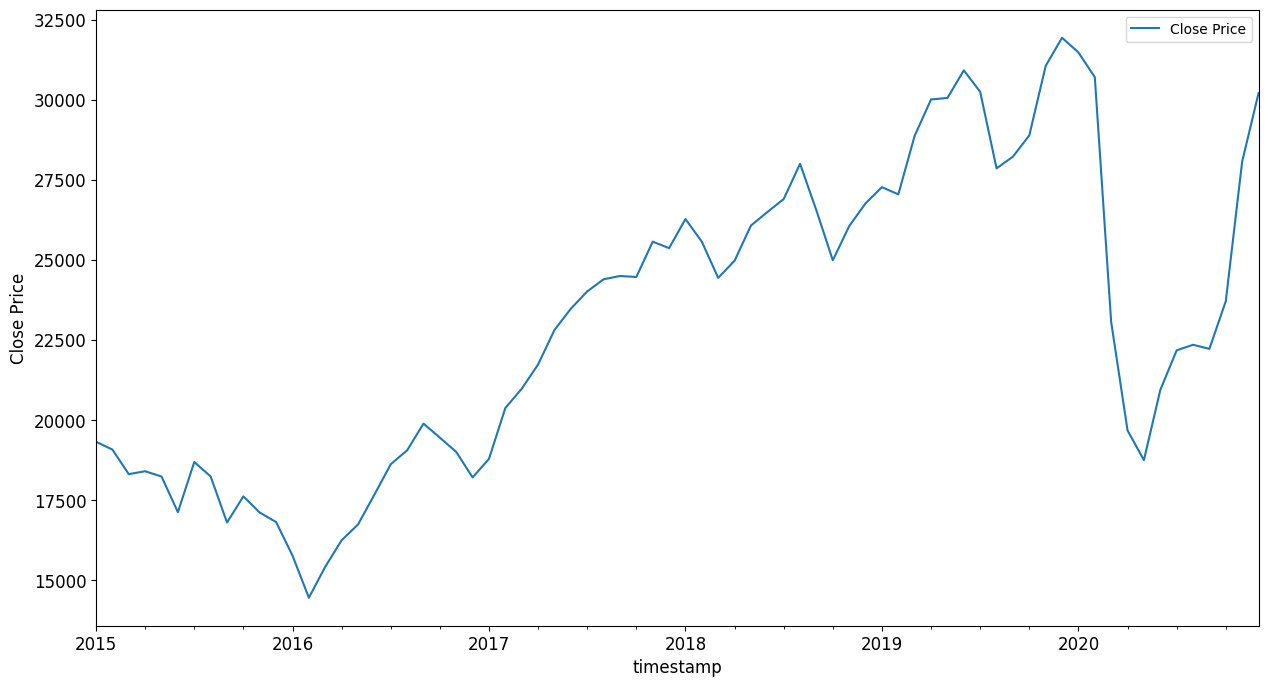

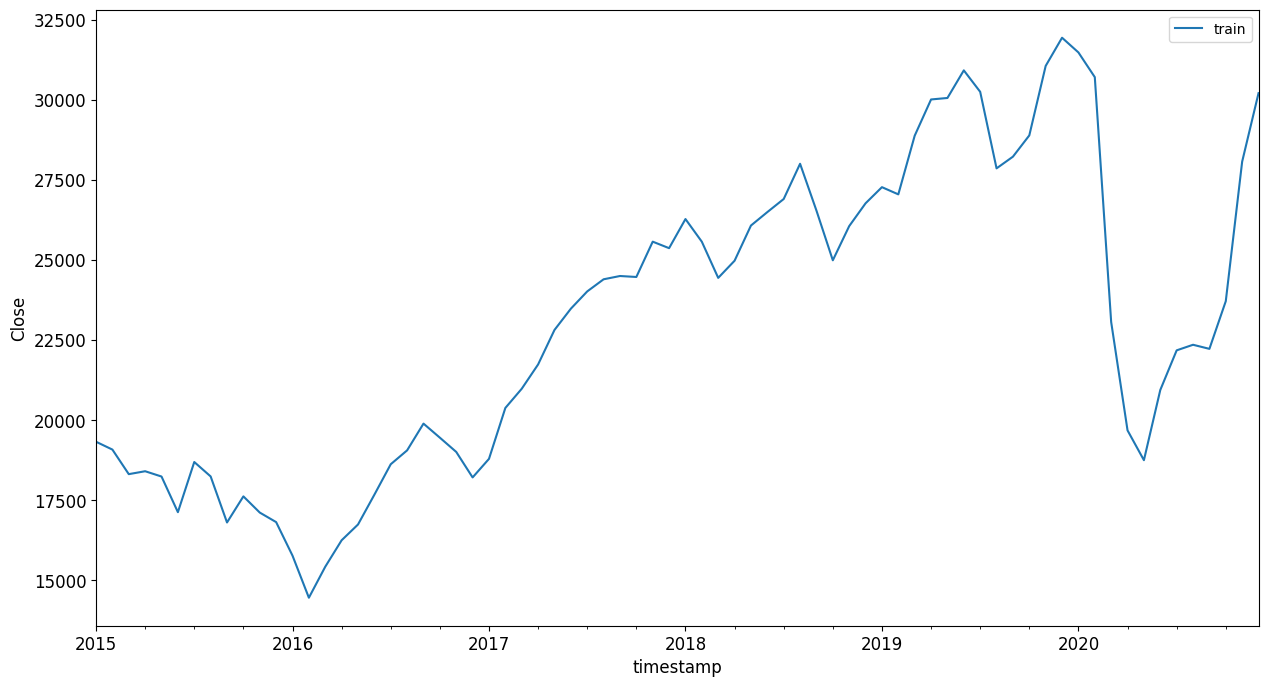

In [4]:
close.plot(y='Close Price', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.show()

# Load 300 data
close[:300][['Close Price']].rename(columns={'Close Price':'train'}) \
    .plot(y=['train'], figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('Close', fontsize=12)
plt.show()

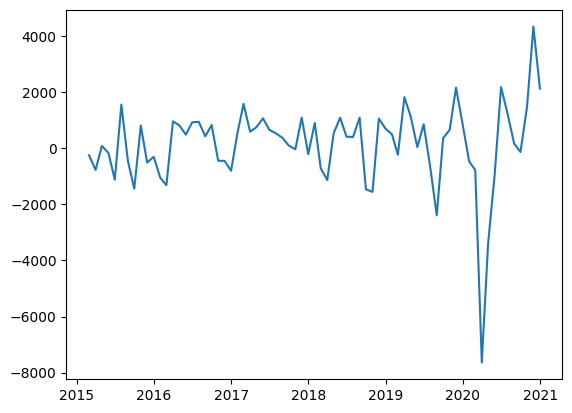

In [5]:
plt.plot(close[:100].diff())

Training data shape:  (50, 1)
Test data shape:  (22, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

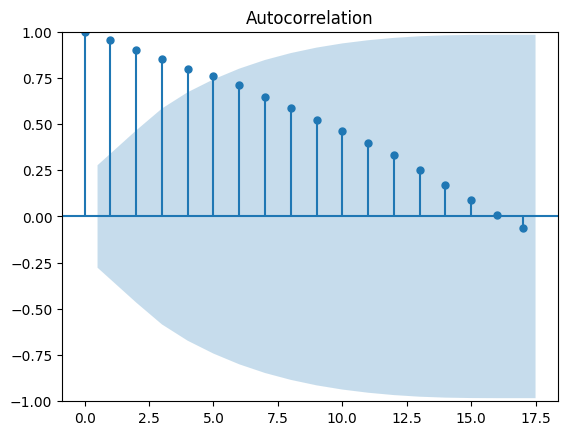

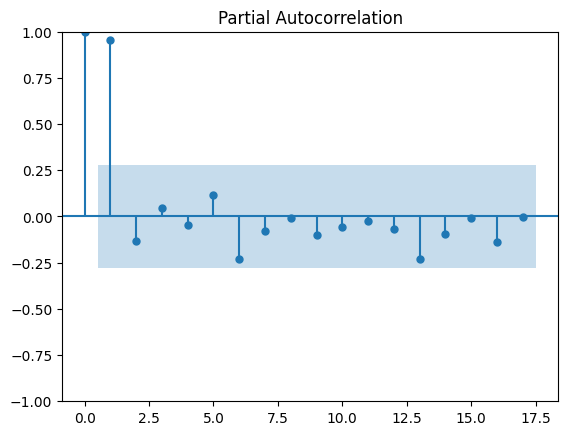

In [7]:
n = int(len(df) * 0.7)
m = int(len(df) * 0.7)

df_train = close.copy()[:n][['Close Price']]
df_test = close.copy()[m:][['Close Price']]

print('Training data shape: ', df_train.shape)
print('Test data shape: ', df_test.shape)

plot_acf(df_train['Close Price'])
plot_pacf(df_train['Close Price'])
plt.show

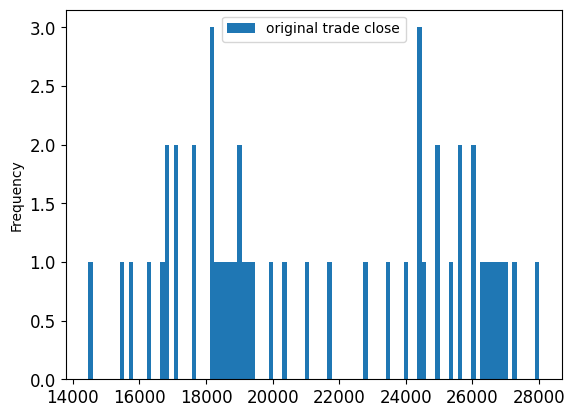

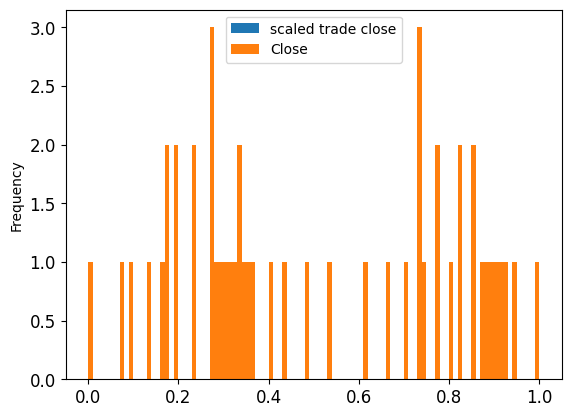

In [9]:
#SCALE TRAIN 
scaler=MinMaxScaler()
df_train['Close Price']=scaler.fit_transform(df_train)

close[:n][['Close Price']].rename(columns={'Close Price':'original trade close'}).plot.hist(bins=100, fontsize=12)
df_train.rename(columns={'Close Price':'scaled trade close'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [14]:
# SCALE TEST
df_test['Close Price'] = scaler.transform(df_test)
df_test.head()

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Close
